In [84]:
# import library yang dibutuhkan 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# traintest split
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

# Preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML algorithm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

# **California Housing Price**

## **1. Business Problem Understanding**

### **Context**

The dataset at hand originates from the 1990 California census. Although it is dated and does not reflect the current market conditions, it serves as a practical basis for learning about and developing machine learning models for real estate price prediction. The data covers various attributes of housing such as location, age, room count, and proximity to the ocean, providing a foundational understanding of the factors influencing housing prices during that time.

### **Problem Statement**

The current approach for predicting housing prices in California lacks the necessary accuracy, leading to issues like overpricing or underpricing of properties. This misalignment with actual market values has caused suboptimal business decisions, negatively affecting profitability and the company’s ability to stay competitive in the real estate market. The primary problem to solve is building a robust predictive model that can better estimate housing prices based on available data, while also considering additional relevant factors that influence property values.

### **Goals**

The main goal of the project is to develop an accurate machine learning model for predicting housing prices. This will support better decision-making in the real estate business by enabling more precise pricing strategies. To achieve this, an essential sub-goal is to improve the model's accuracy by incorporating additional features and identifying key factors that lead to prediction errors. In the long run, the company aims to use the model to increase profitability and strengthen its competitive position by aligning its pricing more closely with actual market conditions.

### **Analytic Approach**

The analytics approach starts with data collection and preprocessing, which involves cleaning the dataset, handling missing values, normalizing features, and encoding categorical variables where necessary. This will be followed by feature engineering, where new features that potentially influence housing prices, such as proximity to city centers, property size, and nearby amenities, will be added to the dataset. After ensuring the data is well-prepared, different machine learning models like Linear Regression, Decision Trees, and Random Forests will be developed to predict housing prices. To ensure the best performance, cross-validation and hyperparameter tuning will be applied. Additionally, error analysis will be performed by examining overestimation and underestimation cases, particularly focusing on the most extreme errors. This will help in identifying relationships between the errors and independent variables, which can guide further refinement of the features. In the future, the model could also incorporate sentiment analysis from customer reviews, which would provide additional insights and features that reflect the qualitative aspects of properties.

### **Metric Evaluation**

To evaluate the performance of the model, several metrics will be used. Mean Squared Error (MSE) will measure the average squared difference between predicted and actual prices, penalizing large errors. Mean Absolute Error (MAE) will provide a more straightforward interpretation by calculating the average magnitude of the errors without considering their direction. Mean Absolute Percentage Error (MAPE) will offer an error measurement in percentage terms, which is useful for business stakeholders. Lastly, R-squared (R²) will assess how well the independent variables explain the variance in housing prices. These metrics ensure that the model is not only accurate but also interpretable and actionable for business decision-making.

## **2. Data Understanding & EDA**

### **Data Understanding**

**The columns are as follows, and their names are pretty self-explanatory:**
- longitude
- latitude
- Housing median age
- total_rooms
- total_bedrooms
- population
- households
- median_income
- median house value
- ocean_proximity


In [85]:
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [86]:
df.shape

(14448, 10)

In [87]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


**Missing Value**

In [89]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [90]:
df[(df['total_bedrooms'].isna())]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
88,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,65800.0
119,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0
251,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,158700.0
340,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0
410,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,INLAND,76400.0
...,...,...,...,...,...,...,...,...,...,...
13856,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,150400.0
13932,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,231000.0
13989,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,221500.0
14308,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN,170600.0


In [91]:
bed_med = df['total_bedrooms'].median()
bed_med

435.0

In [92]:
df['total_bedrooms'].fillna(bed_med, inplace=True) 

In [93]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

**Duplicated**

In [94]:
df.duplicated().sum()

0

### **EDA**

**Heatmap**

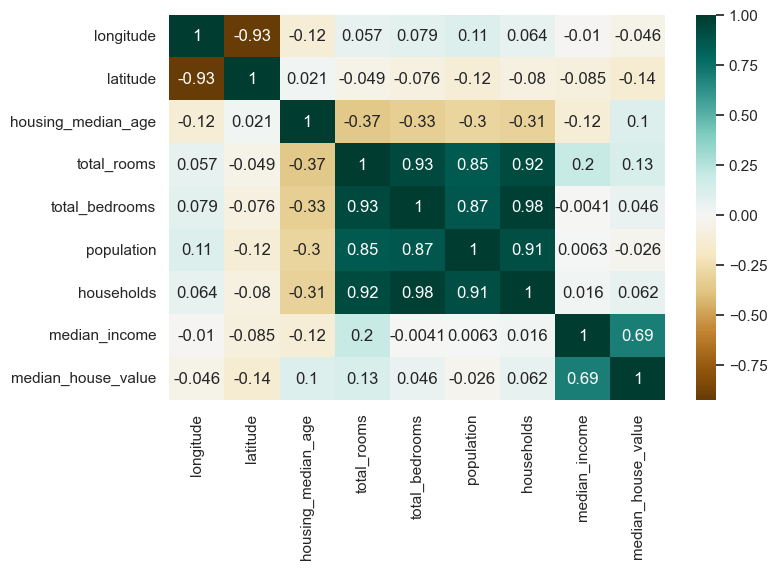

In [95]:
plt.figure(figsize=(8,5))

sns.heatmap(data = df.corr(numeric_only=True),
            annot=True,
            cmap='BrBG',
            center=0)

plt.show()

**OUTLIERS**

Boxplot

<Figure size 800x500 with 0 Axes>

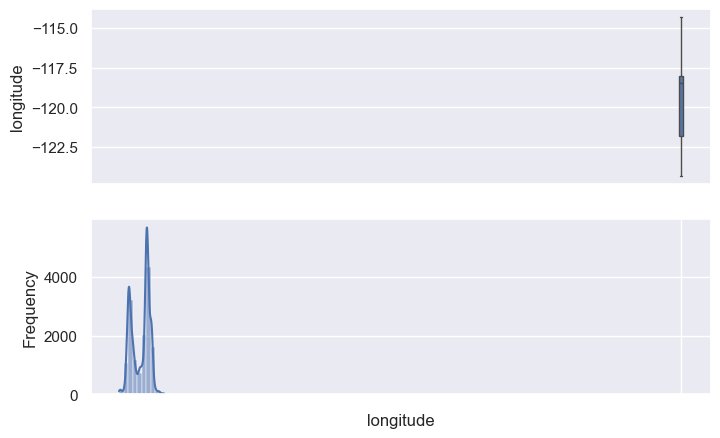

<Figure size 800x500 with 0 Axes>

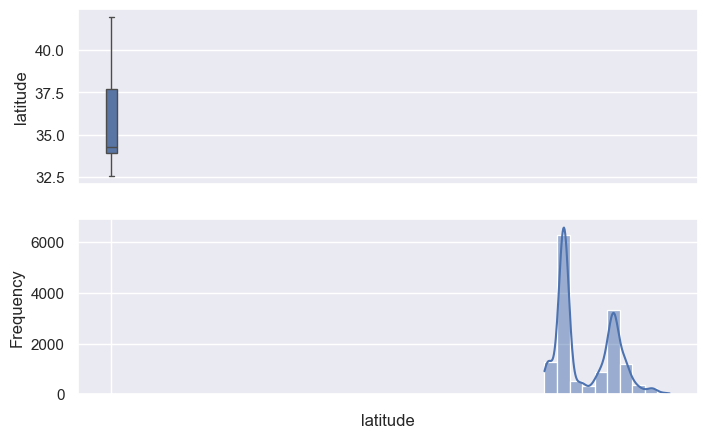

<Figure size 800x500 with 0 Axes>

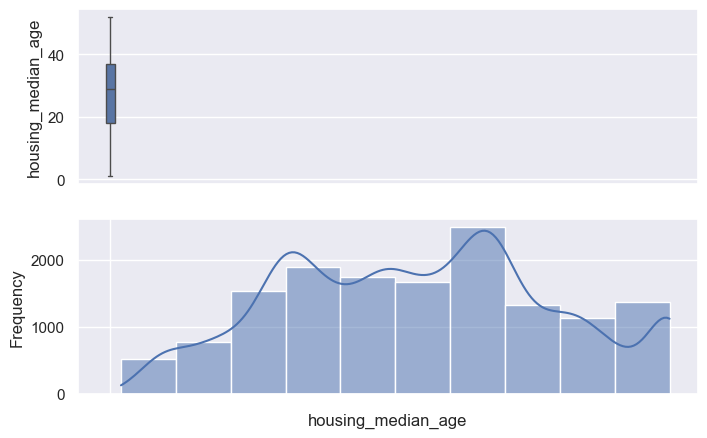

<Figure size 800x500 with 0 Axes>

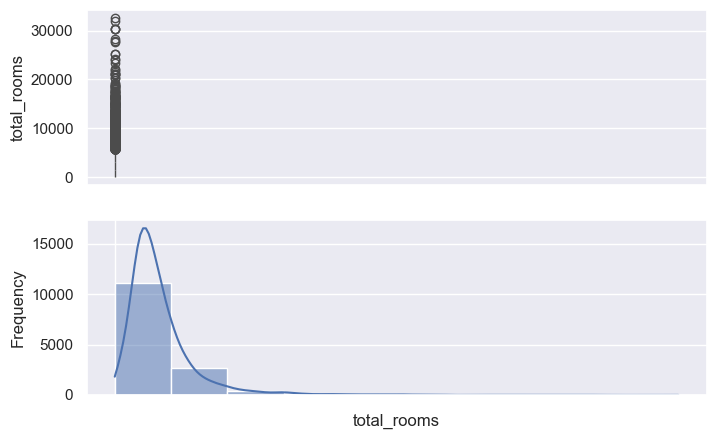

<Figure size 800x500 with 0 Axes>

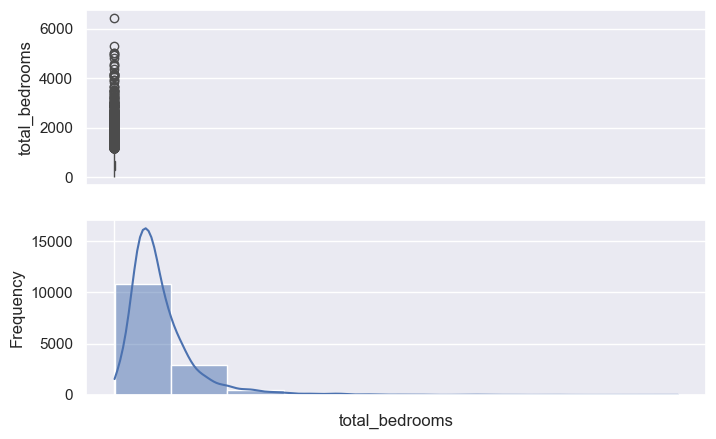

<Figure size 800x500 with 0 Axes>

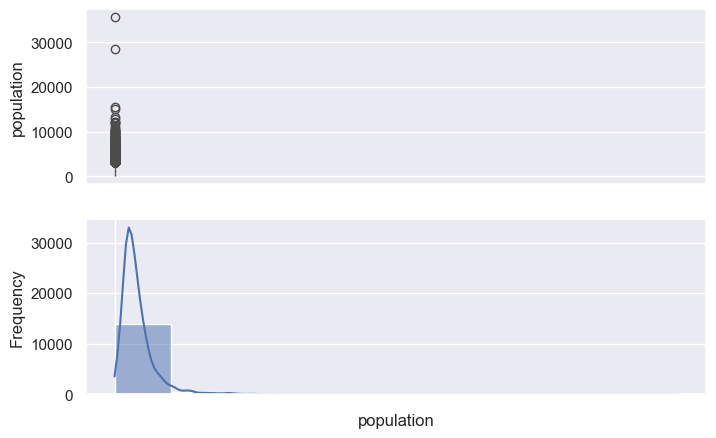

<Figure size 800x500 with 0 Axes>

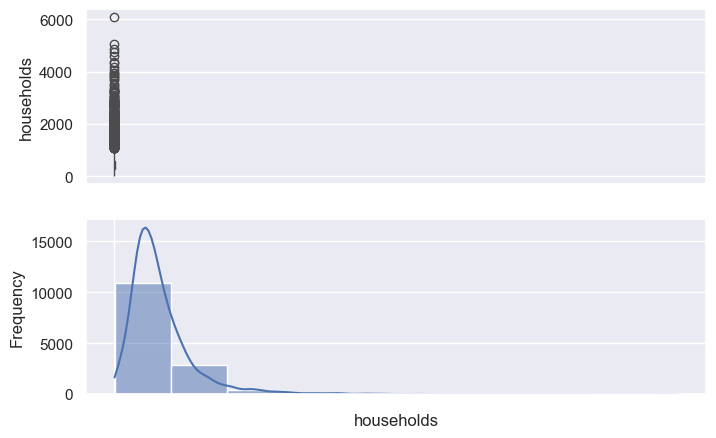

<Figure size 800x500 with 0 Axes>

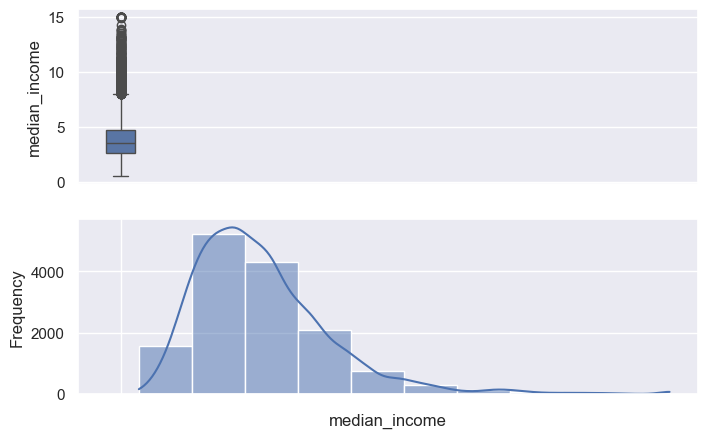

<Figure size 800x500 with 0 Axes>

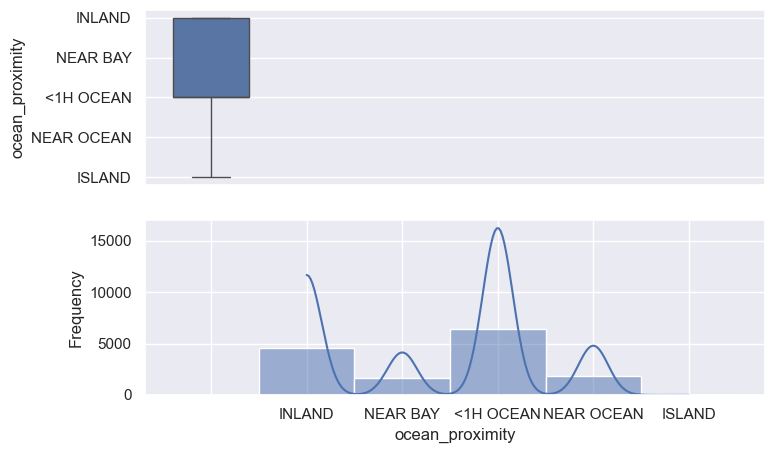

<Figure size 800x500 with 0 Axes>

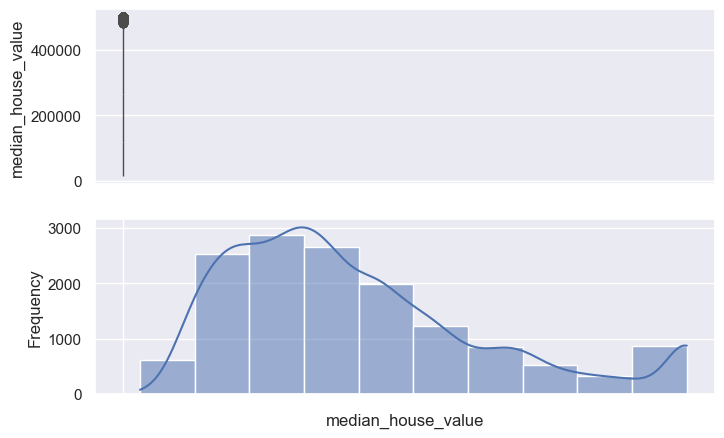

In [96]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

Total Rooms

In [97]:
Q1_tr = df['total_rooms'].quantile(0.25)
Q3_tr = df['total_rooms'].quantile(0.75)
IQR_tr = Q3_tr - Q1_tr
IQR_tr

1697.0

In [98]:
outliers_tr = Q3_tr + 3*(IQR_tr)
df.drop(df[df['total_rooms'] > outliers_tr].index, axis = 0, inplace =True)
df.shape

(14089, 10)

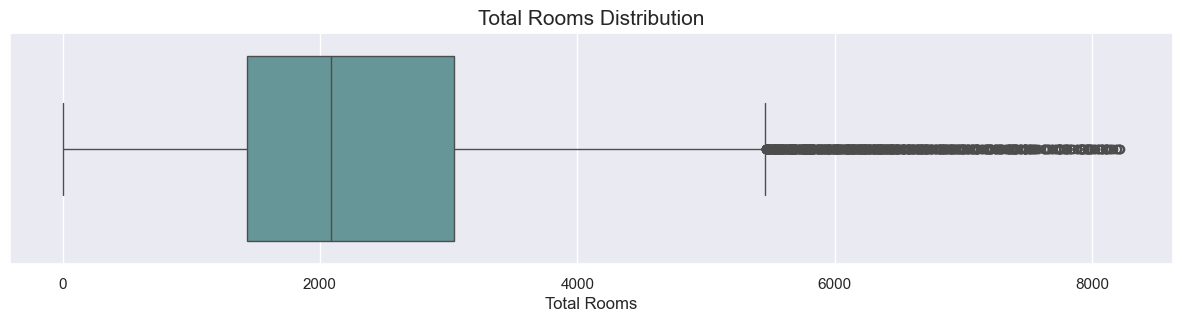

In [99]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='total_rooms', color='cadetblue')
plt.xlabel('Total Rooms')
plt.title('Total Rooms Distribution', fontsize=15)

plt.show()

**Insights:**

1. Skewness: Despite the removal of outliers, the distribution of total rooms still exhibits some level of right skewness (positive skew). This suggests that while the extreme values have been eliminated, there are still more properties with fewer rooms than those with many rooms. The tail on the right side indicates that some properties still have above-average room counts, but they are within a more reasonable range.

2. Outliers: After removing extreme outliers, the number of apparent outliers has significantly decreased. The boxplot shows far fewer points beyond the whiskers, indicating that most of the data now lies within a normal range. Any remaining outliers are less extreme and closer to the central values, meaning they have a less distorting effect on the overall interpretation of the dataset.

3. Median: The central line in the box represents the median number of rooms. The median is relatively low, which reflects the fact that half of the properties have fewer than the median number of rooms, while the other half have more. The median provides a robust measure of central tendency, especially in skewed distributions. With the outliers removed, the median becomes an even more reliable indicator of typical housing size.

Total Bedrooms

In [100]:
Q1_tb = df['total_bedrooms'].quantile(0.25)
Q3_tb = df['total_bedrooms'].quantile(0.75)
IQR_tb = Q3_tb - Q1_tb
IQR_tb

330.0

In [101]:
outliers_tb = Q3_tb + 3*(IQR_tb)
df.drop(df[df['total_bedrooms'] > outliers_tb].index, axis = 0, inplace =True)

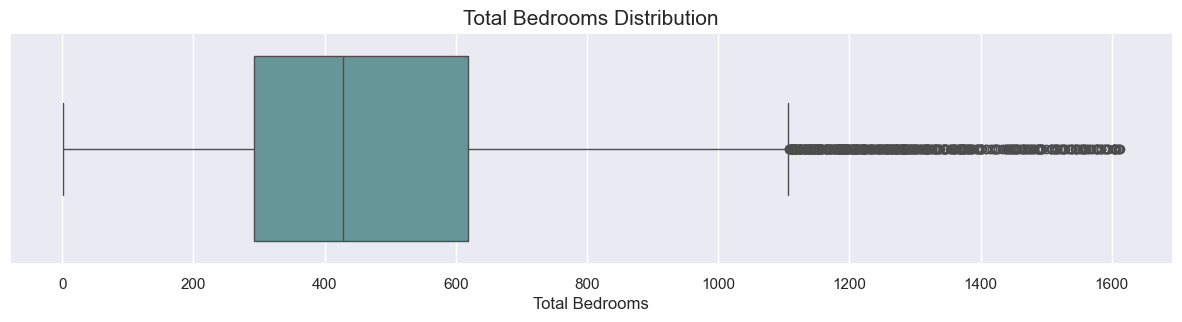

In [102]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='total_bedrooms', color='cadetblue')
plt.xlabel('Total Bedrooms')
plt.title('Total Bedrooms Distribution', fontsize=15)

plt.show()

Population

In [103]:
# element outliers in population 
Q1_p = df['population'].quantile(0.25)
Q3_p = df['population'].quantile(0.75)
IQR_p = Q3_p - Q1_p
IQR_p

881.0

In [104]:
outliers_p = Q3_p + 3*(IQR_p)
df.drop(df[df['population'] > outliers_p].index, axis = 0, inplace =True)
df.shape

(13908, 10)

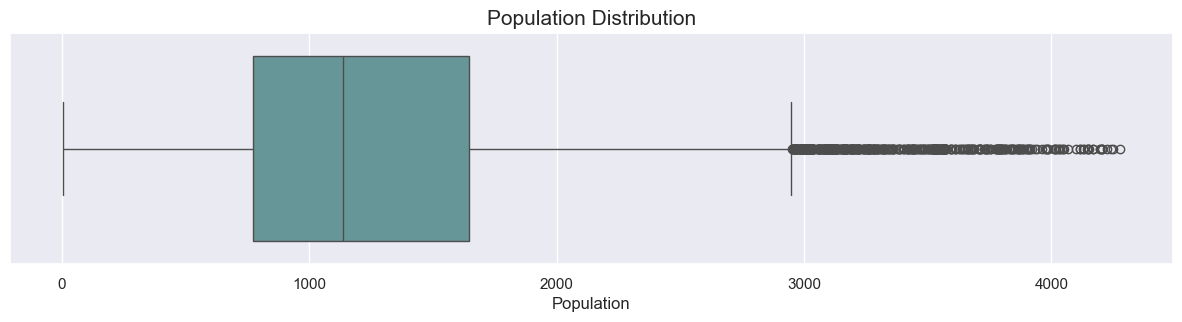

In [105]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='population', color='cadetblue')
plt.xlabel('Population')
plt.title('Population Distribution', fontsize=15)

plt.show()

Households

In [106]:
# element the outliers in household
Q1_h = df['households'].quantile(0.25)
Q3_h = df['households'].quantile(0.75)
IQR_h = Q3_h - Q1_h
IQR_h

301.0

In [107]:
outliers_h = Q3_h + 3*(IQR_h)
df.drop(df[df['households'] > outliers_h].index, axis = 0, inplace =True)
df.shape

(13889, 10)

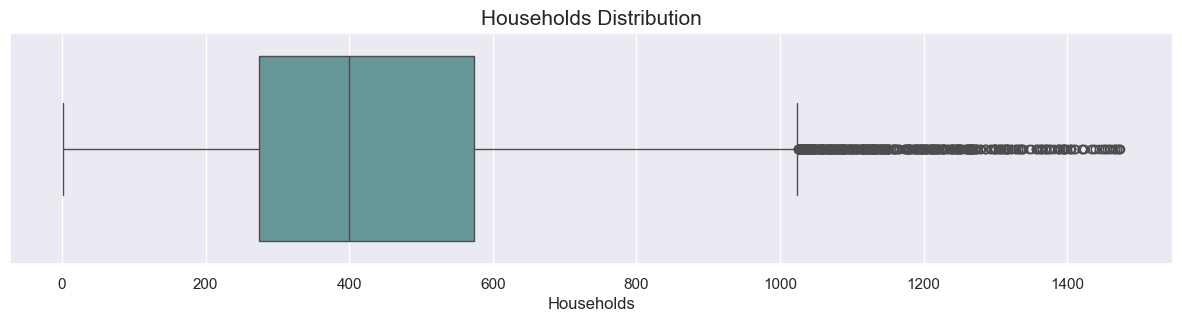

In [108]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='households', color='cadetblue')
plt.xlabel('Households')
plt.title('Households Distribution', fontsize=15)

plt.show()

Total Rooms

In [109]:
# element the outliers in household
Q1_tr = df['total_rooms'].quantile(0.25)
Q3_tr = df['total_rooms'].quantile(0.75)
IQR_tr = Q3_tr - Q1_tr
IQR_tr

1563.0

In [110]:
outliers_tr = Q3_tr + 3*(IQR_tr)
df.drop(df[df['total_rooms'] > outliers_tr].index, axis = 0, inplace =True)
df.shape

(13856, 10)

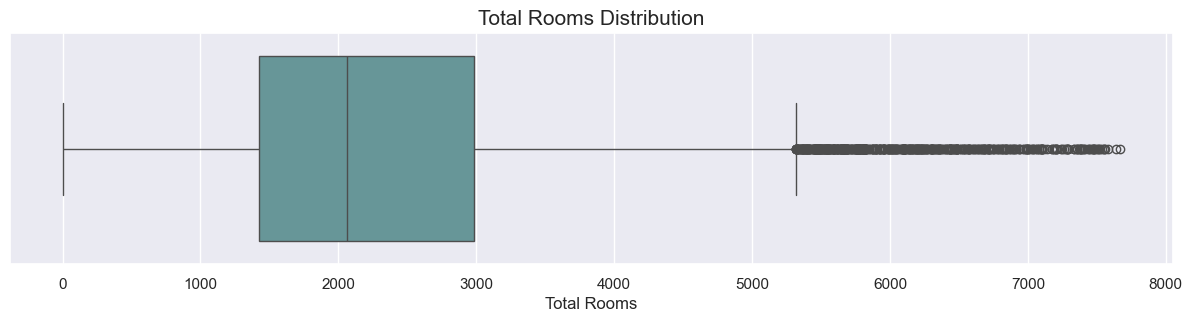

In [111]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='total_rooms', color='cadetblue')
plt.xlabel('Total Rooms')
plt.title('Total Rooms Distribution', fontsize=15)

plt.show()

In [112]:
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925069,-0.108073,0.023403,0.058754,0.123413,0.049827,-0.011560,-0.045332
latitude,-0.925069,1.000000,0.010654,-0.026163,-0.068305,-0.144216,-0.080493,-0.085172,-0.144932
housing_median_age,-0.108073,0.010654,1.000000,-0.337278,-0.276054,-0.248672,-0.254181,-0.108253,0.112569
total_rooms,0.023403,-0.026163,-0.337278,1.000000,0.885725,0.783412,0.885468,0.230457,0.172531
total_bedrooms,0.058754,-0.068305,-0.276054,0.885725,1.000000,0.831108,0.969068,-0.059776,0.045858
population,0.123413,-0.144216,-0.248672,0.783412,0.831108,1.000000,0.873180,-0.047382,-0.061037
households,0.049827,-0.080493,-0.254181,0.885468,0.969068,0.873180,1.000000,-0.028698,0.065717
median_income,-0.011560,-0.085172,-0.108253,0.230457,-0.059776,-0.047382,-0.028698,1.000000,0.691708
median_house_value,-0.045332,-0.144932,0.112569,0.172531,0.045858,-0.061037,0.065717,0.691708,1.000000


**Histograms**

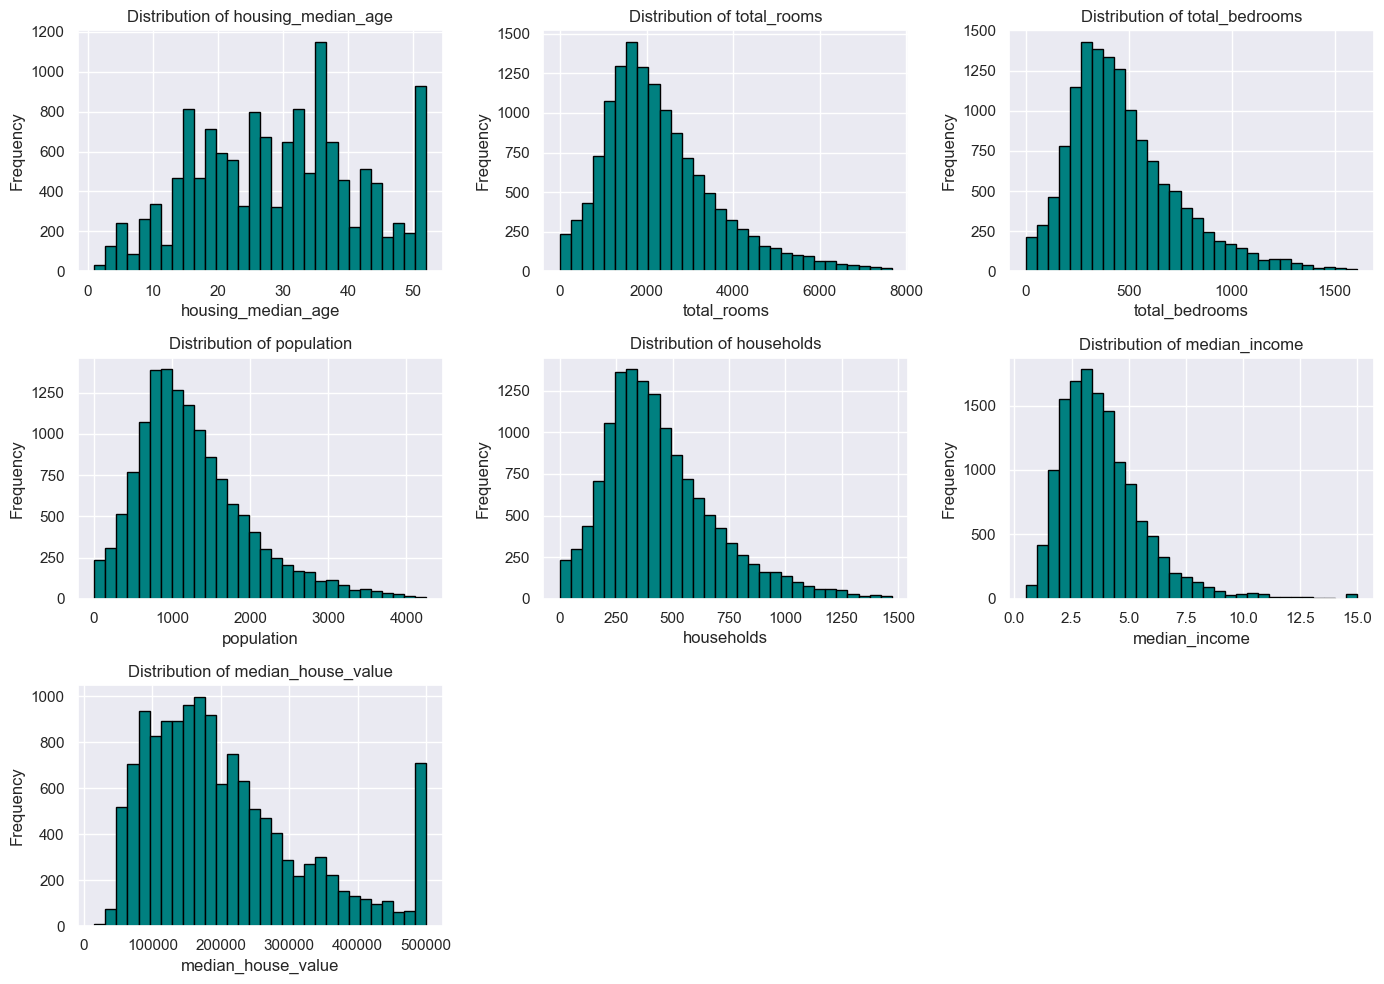

In [113]:
numerical_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    plt.hist(df[col], bins=30, color='teal', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Insights:**

- **Housing median age:** The distribution is right-skewed, with a significant number of houses aged around 20-30 years.
- **Total rooms:** The distribution is right-skewed, with most areas having fewer rooms.
- **Total bedrooms:** Similarly to total rooms, the number of bedrooms is also right-skewed.
- **Population:** Most areas have smaller populations, with a few areas having much larger populations.
- **Households:** Follows a similar trend to the population, with most areas having fewer households.
- **Median income:** The income distribution is slightly right-skewed, with most values clustered around the lower range, between $2-5k.
- **Median house value:** The distribution shows that a significant portion of house values is capped at $500,001.

**Correlation Matrix**

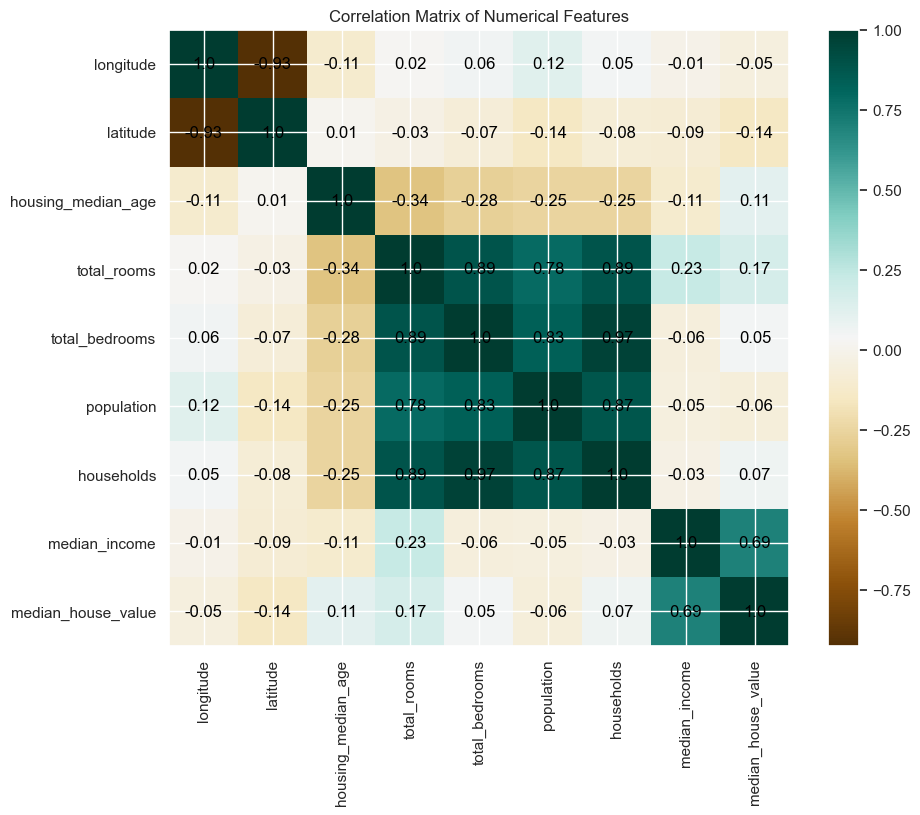

In [114]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='BrBG', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, np.round(correlation_matrix.iloc[i, j], 2), ha='center', va='center', color='black')

plt.title('Correlation Matrix of Numerical Features')
plt.show()


**Insights:**

1. Total rooms and total bedrooms have a strong positive correlation, as expected (more rooms tend to mean more bedrooms).
2. Population and households also show a strong positive correlation.
3. Median income is positively correlated with median house value, indicating that wealthier areas tend to have higher house prices.
4. Interestingly, housing_median_age does not show a strong correlation with median house value, suggesting that newer or older homes do not drastically affect house prices.

**Countplot**

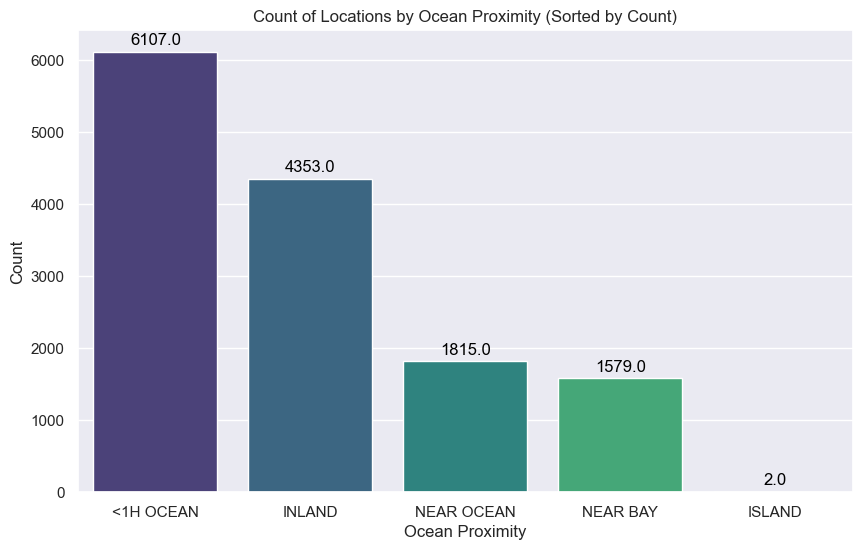

In [115]:
sorted_order = df['ocean_proximity'].value_counts().index

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='ocean_proximity', data=df, palette='viridis', order=sorted_order)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Count of Locations by Ocean Proximity (Sorted by Count)')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()


**Insights:**

1. <1H OCEAN: The majority of the data points represent areas that are within one hour's distance from the ocean. This indicates that a significant portion of the population lives relatively close to the coast, which could positively affect housing demand and prices.

2. INLAND: The second largest category is INLAND, showing that a large portion of the dataset covers areas far from the ocean. These areas might be more affordable, given their distance from the coast, though other factors like population density and urbanization may still influence prices.

3. NEAR OCEAN and NEAR BAY: These categories have fewer data points compared to <1H OCEAN but are still substantial. Properties in these areas are likely highly desirable, with proximity to the ocean being a key factor driving higher housing values.

4. ISLAND: This category has the fewest data points, suggesting that islands are a rare feature in this dataset, likely making them unique but potentially more expensive due to exclusivity.

**Scatterplot**

<Axes: xlabel='median_income', ylabel='median_house_value'>

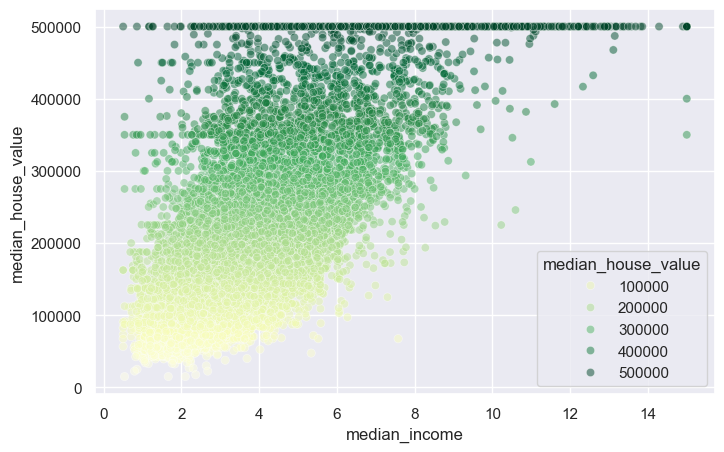

In [116]:
sns.scatterplot(x=df['median_income'], y=df['median_house_value'], hue=df['median_house_value'],alpha=0.5, palette='YlGn')

**Insights:**
1. Positive Correlation: There is a clear positive relationship between median income and median house value. Higher-income areas tend to have higher house values, as indicated by the upward trend.

2. Price Cap Effect: Many house values are capped at around $500,000, creating a horizontal line in the plot. This suggests a possible upper limit in the dataset, either due to data collection limits or housing market regulations.

3. Variation in Lower Income Brackets: In areas with lower median income (less than $5,000), there's a wide range of house values, suggesting variability in housing affordability in these regions. Some low-income areas still have relatively high house prices, likely due to factors such as location, proximity to desirable areas, or coastal influence.

4. Concentration of Higher Values: As median income increases beyond $6,000, house values tend to cluster near the cap. This suggests that for wealthier populations, house prices are more uniformly high, possibly reflecting prime real estate markets.

5. Lower Values in Lighter Greens: The lighter green points, which represent lower house values, are more scattered across the lower income ranges, indicating that less affluent areas experience greater fluctuations in house prices.

## **Model**

**Linear Regression**

**Encoding**

In [117]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [118]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['ocean_proximity'])
], remainder='passthrough')

**Data Splitting**

In [119]:
X = df.drop(columns=['median_house_value'])  
y = df['median_house_value']  

**Train and Test Splitting**

In [120]:
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

**Cross Validation**

In [121]:
# ML algorithm
lr = LinearRegression()
lasso = Lasso(alpha=1, random_state=0)
knn = KNeighborsRegressor(n_neighbors=5)
tree = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=1)

In [122]:
scorer = [
    'neg_root_mean_squared_error', 
    'neg_mean_absolute_error', 
    'neg_mean_absolute_percentage_error'
    ]

In [123]:
# List of models
models = [lr, lasso, knn, tree, rf]

# Lists to store results for RMSE, MAE, MAPE
list_models = []
list_mean_rmse = []
list_std_rmse = []

list_mean_mae = []
list_std_mae = []

list_mean_mape = []
list_std_mape = []

# Cross-validation loop with error handling
for model in models:
        # Pipeline with preprocessing and model training
        pipe_model = Pipeline([
            ('preprocess', transformer),  # Assuming transformer is predefined for encoding/scaling
            ('model', model)
        ])

        # Cross-validation
        cv_score = cross_validate(
            estimator=pipe_model, 
            X=X_train,  # Use X_train as-is, transformation done in the pipeline
            y=y_train, 
            cv=5,  # 5-fold cross-validation
            scoring=scorer,  # Multiple scoring metrics
            error_score='raise'  # Raise an error if something goes wrong
        )

        # Append mean and std deviation of RMSE, MAE, MAPE to the respective lists
        list_mean_rmse.append(cv_score['test_neg_root_mean_squared_error'].mean())
        list_std_rmse.append(cv_score['test_neg_root_mean_squared_error'].std())

        list_mean_mae.append(cv_score['test_neg_mean_absolute_error'].mean())
        list_std_mae.append(cv_score['test_neg_mean_absolute_error'].std())

        list_mean_mape.append(cv_score['test_neg_mean_absolute_percentage_error'].mean())
        list_std_mape.append(cv_score['test_neg_mean_absolute_percentage_error'].std())

In [124]:
df_cv = pd.DataFrame()
df_cv['algo'] = models

df_cv['mean_RMSE'] = list_mean_rmse
df_cv['std_RMSE'] = list_std_rmse

df_cv['mean_MAE'] = list_mean_mae
df_cv['std_MAE'] = list_std_mae

df_cv['mean_MAPE'] = list_mean_mape
df_cv['std_MAPE'] = list_std_mape


df_cv

,algo,mean_RMSE,std_RMSE,mean_MAE,std_MAE,mean_MAPE,std_MAPE
0,LinearRegression(),-67350.354555,1539.565294,-49527.489673,925.317521,-0.290467,0.008604
1,"Lasso(alpha=1, random_state=0)",-67350.487643,1539.543084,-49527.735941,925.680810,-0.290470,0.008605
2,KNeighborsRegressor(),-101150.017565,814.190074,-78225.718720,890.328253,-0.519972,0.018954
3,DecisionTreeRegressor(random_state=0),-71206.491339,2093.430983,-45871.950451,1342.895051,-0.253574,0.002062
4,RandomForestRegressor(random_state=1),-52274.772128,1469.853724,-34456.295895,778.504261,-0.195709,0.006841


**Conclusion:**

- RandomForestRegressor seems to be the most effective model among those tested, given its lower RMSE, MAE, and reasonably low MAPE values, alongside a more stable performance (lower std_RMSE and std_MAE). It appears to balance error magnitude and consistency better than the other models.
- Lasso Regression emerges as the best alternative to RandomForest. Its performance metrics are competitive, and the regularization might provide an edge in preventing overfitting compared to plain Linear Regression

In [125]:
# Benchmark 2 model 
models = {
    'rf': RandomForestRegressor(random_state=1),
    'lasso': Lasso(alpha=1, random_state=0)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))


score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
rf,50346.874621,33465.299278,0.187090
lasso,67924.985105,49903.020863,0.292775


- RandomForestRegressor still have the best score

**Hyperparameter Tuning**

In [126]:
hyperparam_space = {
    'modeling__n_estimators': [100, 200, 300],  
    'modeling__max_depth': [None, 10, 20, 30],  
    'modeling__min_samples_split': [2, 5, 10],  
    'modeling__min_samples_leaf': [1, 2, 4],  
    'modeling__bootstrap': [True, False],  
    'modeling__max_features': ['auto', 'sqrt', 'log2'] 
}


pipe_model = Pipeline([
    ('preprocessing', transformer),  
    ('modeling', rf)
])

# Define grid search
rf_grid = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring=scorer, 
    refit='neg_root_mean_squared_error',
    n_jobs=-1  
)

# Fit grid search to the training data
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['ocean_proximity'])])),
                                       ('modeling',
                                        RandomForestRegressor(random_state=1))]),
             n_jobs=-1,
             param_grid={'modeling__bootstrap': [True, False],
                         'modeling__max_depth': [None, 10, 20, 30],
                         'modeling__max_features': ['auto', 'sqrt', 'log2'],
                         'modeling__min_samples_leaf': [1, 2, 4],
                         'modeling__min_samples_split': [2, 5, 10],
                         'modeling__n_estimators': [100, 200, 300]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [127]:
rf_grid.best_params_ 

{'modeling__bootstrap': False,
 'modeling__max_depth': 30,
 'modeling__max_features': 'sqrt',
 'modeling__min_samples_leaf': 1,
 'modeling__min_samples_split': 2,
 'modeling__n_estimators': 300}

In [128]:
rf_grid.best_score_

-51149.108146477425

In [129]:
pd.DataFrame(rf_grid.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__bootstrap,param_modeling__max_depth,param_modeling__max_features,param_modeling__min_samples_leaf,param_modeling__min_samples_split,param_modeling__n_estimators,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
596,9.857065,0.125986,0.217075,0.023743,False,30,sqrt,1,2,300,...,630.015460,1,-0.196285,-0.206709,-0.186609,-0.185514,-0.191405,-0.193304,0.007716,1
623,10.493112,0.377870,0.229817,0.065003,False,30,log2,1,2,300,...,630.015460,1,-0.196285,-0.206709,-0.186609,-0.185514,-0.191405,-0.193304,0.007716,1
353,12.900469,1.863342,0.299629,0.110589,False,None,sqrt,1,2,300,...,565.851156,5,-0.195348,-0.207468,-0.186939,-0.185745,-0.191627,-0.193425,0.007813,5
380,12.056624,1.585079,0.347264,0.126528,False,None,log2,1,2,300,...,565.851156,5,-0.195348,-0.207468,-0.186939,-0.185745,-0.191627,-0.193425,0.007813,5
595,7.192530,0.362211,0.168955,0.025696,False,30,sqrt,1,2,200,...,645.887326,9,-0.196668,-0.207522,-0.186833,-0.185632,-0.191324,-0.193596,0.007971,11


In [130]:
print('RandomForestRegressor')
print('Best_score:', rf_grid.best_score_)
print('Best_params:', rf_grid.best_params_)

RandomForestRegressor
Best_score: -51149.108146477425
Best_params: {'modeling__bootstrap': False, 'modeling__max_depth': 30, 'modeling__max_features': 'sqrt', 'modeling__min_samples_leaf': 1, 'modeling__min_samples_split': 2, 'modeling__n_estimators': 300}


**Predict to test with tuned model**

In [131]:

# Create a RandomForestRegressor object
model = {
    'rf': RandomForestRegressor(random_state=1) }

# Assuming rf_grid is a GridSearchCV or similar object with a trained model
rf_tuning = rf_grid.best_estimator_

# Fit the model on training data
rf_tuning.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Calculate metrics
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

# Create a DataFrame with the scores
score_after_tuning = pd.DataFrame({
    'RMSE': [rmse_rf_tuning],
    'MAE': [mae_rf_tuning],
    'MAPE': [mape_rf_tuning]
})

print(score_after_tuning)

           RMSE           MAE      MAPE
0  49986.709131  33700.356039  0.188516


**Comparison before and after tuning**

In [132]:
# After hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['rf']).T

,RMSE,MAE,MAPE
rf,50346.874621,33465.299278,0.18709


In [133]:
# After Hyperparameter Tuning
score_after_tuning

,RMSE,MAE,MAPE
0,49986.709131,33700.356039,0.188516


- Model have increase in performance

**Residual Plot**

In [134]:
df_error = pd.DataFrame({
    'y_pred':y_pred,                # sb X: y_pred
    'error': (y_test - y_pred)      # sb Y: error (y_test - y_pred)
})

<Axes: xlabel='y_pred', ylabel='error'>

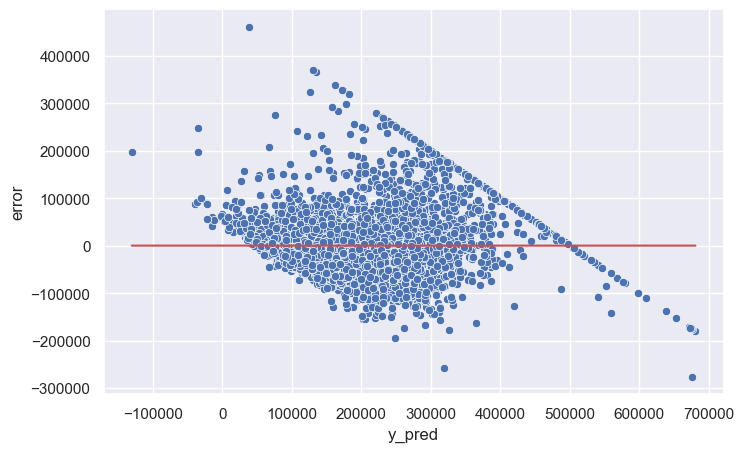

In [135]:
sns.scatterplot(data=df_error, x='y_pred', y='error')
sns.lineplot(data=df_error, x='y_pred', y=0, color='r')

1. Heteroscedasticity: There is a pattern of increasing variability in the residuals as the predicted values increase, suggesting that the model's error variance is not constant across all levels of predicted values.

2. Model Bias: The plot shows a trend where residuals become more negative as predicted values rise, indicating the model tends to overpredict at higher values. This suggests a possible bias in the model as predictions increase.

3. Presence of Outliers: Some data points are significantly distanced from the majority, particularly at higher predicted values, which could be outliers or instances of model underperformance.

**Conclusion:**

The notebook appears to focus on developing a machine learning model to predict housing prices in California. By leveraging various regression models (such as Linear Regression, Decision Trees, and Random Forests) and applying hyperparameter tuning and cross-validation, the objective is to enhance the accuracy of price predictions.

**Given the models and techniques used, the following points summarize the project:**

1. Model Evaluation: Based on the metrics included, such as Mean Squared Error (MSE) and Mean Absolute Error (MAE), the project evaluates the performance of different models. These errors directly show how closely the predicted housing prices align with actual market prices.

2. Business Impact: The goal of this project is to assist the real estate company in more accurately pricing houses in California. A well-performing model can significantly impact pricing strategies, making them more competitive and data-driven.

**Recommendations:**

1. Checking Prediction Results (Error Analysis):
- Error Segmentation: Review the model's prediction errors by grouping them into overestimation and underestimation categories. Identify the top 5% most extreme errors in each group and create three distinct groups: overestimation, underestimation, and the majority group with errors near the mean.
- Independent Variables Relation: Analyze how the independent variables (features) are related to the extreme errors. This can help determine if certain variables are causing these high errors and whether adjustments or transformations are necessary.

2. Adding More Relevant Features:
- Consider adding more features that are likely to have a significant impact on housing prices. For example:
- Proximity to City Center: Distance to major city centers or business districts often affects housing prices.
- Property Size: Total square footage or room sizes can be strong predictors of price.
- Amenities: Nearby schools, parks, public transport access, or shopping facilities can be key variables to add to improve model accuracy.

3. Exploring Different Models:
- Complex Models for Larger Data: If a significant amount of additional data becomes available, consider using more advanced models such as Recursive Neural Networks (RNN) or other deep learning techniques. These models may be able to capture more complex relationships in the data.
- Current Model Optimization: For the current dataset, further tuning of models like Random Forests, Gradient Boosting, or adding ensemble methods could improve results without needing to switch to a more complex neural network model.

4. Incorporating Sentiment Analysis:
- If customer reviews or feedback are available for properties, perform sentiment analysis on these reviews. This can provide additional features for the model. For example:
- Assign sentiment scores from -1 (negative) to 1 (positive) for each review.
- Sentiment as a Feature: The average sentiment score for each listing can then be used as a feature in the pricing model. Positive reviews might indicate desirable properties and could lead to higher prices.
- Sentiment features could improve the accuracy of price predictions, especially for properties that have received a significant amount of customer feedback or reviews.